### Bibliotecas úteis para Time Series com Python


*   Pandas
*   Scikit-learn
*   Numpy
*   Statsmodel



### Explorando os dados

In [1]:
import pandas as pd
series = pd.read_csv('champagne_sales.csv')

In [2]:
type(series)

pandas.core.frame.DataFrame

In [3]:
series.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877




*   **header=0** : A informação de colunas está na primeira linha do arquivo
*   **parse_date=True** : Sinalizamos que o dataset contém coluna do tipo date.
*   **index_col=0** : Definimos nossa coluna indice que é a informação temporal.
*   **squeeze=True**: Sinalizamos que nos temos apenas um dado de coluna e que queremos transformar isso em uma série e não em um dataframe.



In [4]:
from pandas import read_csv
series = read_csv('champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

**Explorando e resumindo os dados**

In [5]:
series.describe()

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Sales, dtype: float64

**Visualizando dados**

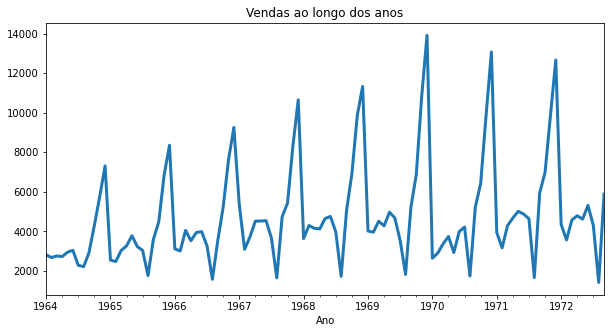

In [6]:
import matplotlib.pyplot as plt
series.plot(figsize=(10,5), 
            linewidth=3, 
            fontsize=10,
            title='Vendas ao longo dos anos')
plt.xlabel('Ano', fontsize=10);

**Vendas no ano de 1964 e 1965**

In [7]:
series['1964']

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
1964-06-01    3036
1964-07-01    2282
1964-08-01    2212
1964-09-01    2922
1964-10-01    4301
1964-11-01    5764
1964-12-01    7312
Name: Sales, dtype: int64

In [8]:
series['1965-01']

Month
1965-01-01    2541
Name: Sales, dtype: int64

In [9]:
series.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [10]:
series.values

array([ 2815,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7312,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6872, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951,  6981,  9851, 12670,  4348,  3564,  4577,
        4788,  4618,  5312,  4298,  1413,  5877])

**Vendas por mês de cada ano**

In [11]:
from pandas import Grouper
from matplotlib import pyplot
from pandas import DataFrame

In [12]:
series

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

In [13]:
# Removendo os dados do ano 1972 por este ano ter menos dados
series.drop(series['1972'].index, inplace=True)

In [14]:
grupos = series.groupby(Grouper(freq='A'))
anos = DataFrame()
for nome, grupo in grupos:
  anos[nome.year] = grupo.values

In [15]:
anos

,1964,1965,1966,1967,1968,1969,1970,1971
0,2815,2541,3113,5375,3633,4016,2639,3934
1,2672,2475,3006,3088,4292,3957,2899,3162
2,2755,3031,4047,3718,4154,4510,3370,4286
3,2721,3266,3523,4514,4121,4276,3740,4676
4,2946,3776,3937,4520,4647,4968,2927,5010
5,3036,3230,3986,4539,4753,4677,3986,4874
6,2282,3028,3260,3663,3965,3523,4217,4633
7,2212,1759,1573,1643,1723,1821,1738,1659
8,2922,3595,3528,4739,5048,5222,5221,5951
9,4301,4474,5211,5428,6922,6872,6424,6981


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e12d6a5b0>,
      dtype=object)

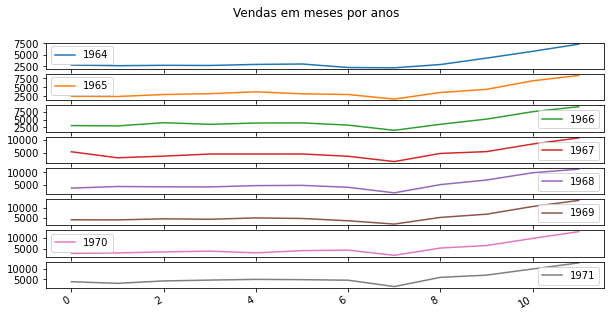

In [16]:
anos.plot(figsize=(10,5)
          ,subplots=True
          ,title='Vendas em meses por anos')

**Vendas por ano - Gráfico de pontos**

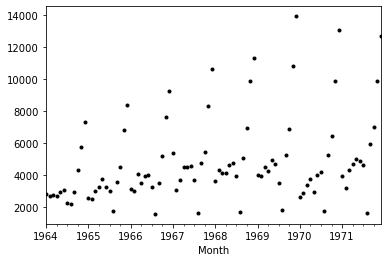

In [17]:
series.plot(style='k.')

**Visualizando a distribuição da série**

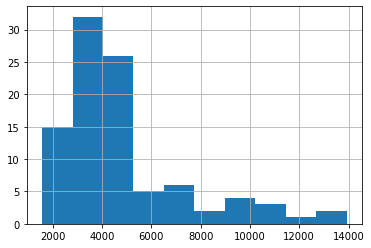

In [18]:
series.hist()

**Gráfico de Densidade**

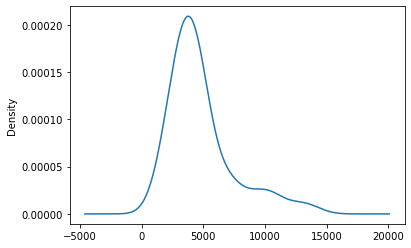

In [19]:
series.plot(kind='kde')

**Visualizando Outliers por anos**

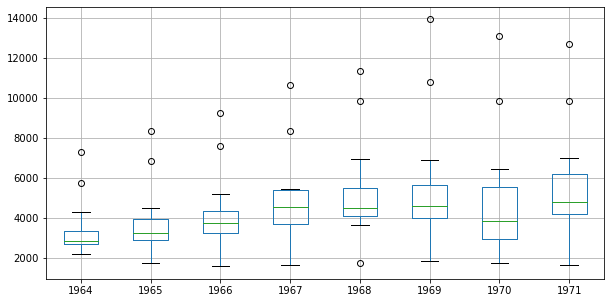

In [20]:
grupos = series.groupby(Grouper(freq='A'))
anos = DataFrame() 
for nome, grupo in grupos:
  anos[nome.year] = grupo.values
anos.boxplot(figsize=(10,5))

**Dispersão de valores e lags**


*   Visualizando a dispersão entre o valor t e t+n



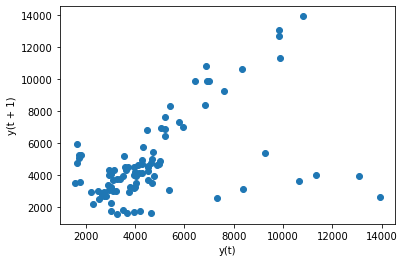

In [21]:
from pandas.plotting import lag_plot
lag_plot(series, lag=1)

**Autocorrelação**



1.   Mede a autocorrelação entre os lags.
2.   Ao execer as linhas pontilhadas mostra relevância estatística.



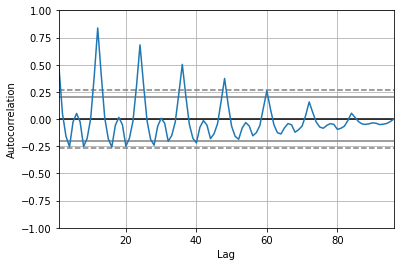

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)

**Autocorrelação com Statsmodels**



*   Calcula a correlação com lags.
*   Pode ser utilizado para configurações de modelos de previsão.
*   Exibe o intervalo de confiança de 95% por padrão.

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

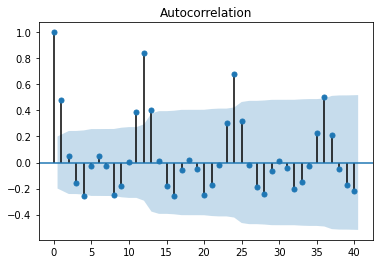

In [24]:
plot_acf(series, lags=40)
pyplot.show()

###Modelando Dados

Remodelar os dados envolve alterar a frequência das observacoes em dois tipos:

 **Upsampling**: Significa aumentar a frequencia das amostras, como por exemplo, minutos para segundos.

 **Downsampling**: Significa diminuir a frequencia das amostras, como por exemplo, dias para meses.

Existem duas principais razoes porque queremos remodelar nossos dados:

 **Problem Framing**: Remodelar os dados para trabalhar na mesma frequencia que as predicoes que iremos entregar.

 **Feature Engineering**: Remodelar os dados podem entregar insights e informações importantes para modelos de machine learning.

In [25]:
resample = series.resample('2M')

In [26]:
type(resample)

pandas.core.resample.DatetimeIndexResampler

In [27]:
print(resample)

DatetimeIndexResampler [freq=<2 * MonthEnds>, axis=0, closed=right, label=right, convention=start, origin=start_day]


Cria uma variável para receber os dados do tipo série.

In [28]:
vendas_medias_dois_meses = resample.mean()

In [29]:
print(vendas_medias_dois_meses.head(5))

Month
1964-01-31    2815.0
1964-03-31    2713.5
1964-05-31    2833.5
1964-07-31    2659.0
1964-09-30    2567.0
Freq: 2M, Name: Sales, dtype: float64


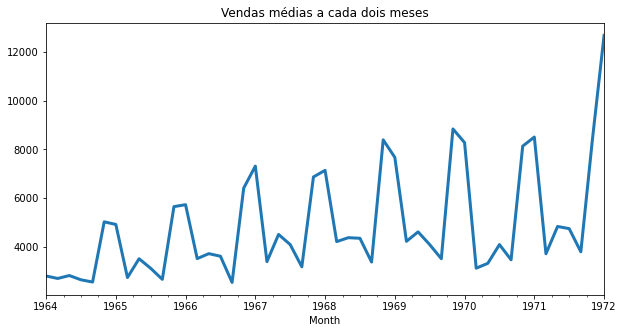

In [30]:
vendas_medias_dois_meses.plot(figsize=(10,5), linewidth=3, fontsize=10, title='Vendas médias a cada dois meses')
pyplot.show()

Trabalhando com Trimestres

In [31]:
upsampled = series.resample('Q')

In [32]:
vendas_trimestre = upsampled.mean()

Plota o gráfico de vendas por trimestre

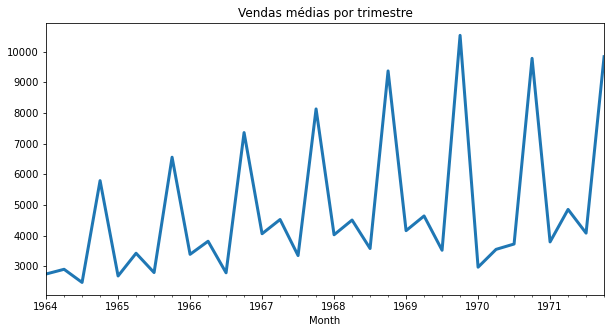

In [33]:
vendas_trimestre.plot(figsize=(10,5), linewidth=3, fontsize=10, title='Vendas médias por trimestre')
pyplot.show()

Calculando a média de vendas por ano

In [34]:
resample = series.resample('A')

In [35]:
vendas_medias_por_ano = resample.mean() 
print(vendas_medias_por_ano.head())

Month
1964-12-31    3478.166667
1965-12-31    3864.166667
1966-12-31    4337.666667
1967-12-31    5016.000000
1968-12-31    5370.583333
Freq: A-DEC, Name: Sales, dtype: float64


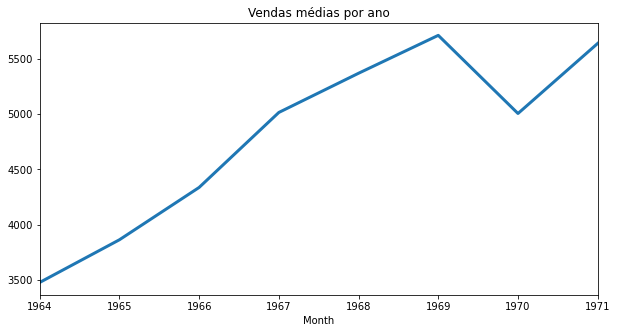

In [36]:
vendas_medias_por_ano.plot(figsize=(10,5), linewidth=3, fontsize=10, title='Vendas médias por ano')
pyplot.show()

#### Engenharia de Features para Séries temporais


*   Objetivo da Engenharia de Features:
    - Fornecer uma **forte e simples** relação entre as variáveis de entrada e a variável alvo para o algoritmo de Machine Learning
    - Para Séries temporais não existe uma relação entre **variáveis de entrada e saída**, nós devemos inventar esses para modelar isso como um problema de aprendizado supervisionado a partir do zero.
    - Podemos nos basear na capacidade de modelos sofisticados para decifrar a complexidade do problema. Ou melhor, podemos facilitar o trabalho para esses modelos (e até usar modelos mais simples) se pudermos expor melhor o relacionamento inerente entre entradas e saídas nos dados.

*  É muito usado em séries temporais features que refletem:

  - *Sazonalidade.*
  - *Janelas de tempo (lag).*
  - *Janelas de tempo com estatísticas.*

*   Foco no negócio. Exemplos: 
    - *Trimestre, dia da semana, dia do mês, feriados, final de semana*
    - *vendas dos dias ou periodos anteriores ou a diferença desses valores*





In [37]:
# datetime tipo de dado
type(series.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [38]:
series

Month
1964-01-01     2815
1964-02-01     2672
1964-03-01     2755
1964-04-01     2721
1964-05-01     2946
              ...  
1971-08-01     1659
1971-09-01     5951
1971-10-01     6981
1971-11-01     9851
1971-12-01    12670
Name: Sales, Length: 96, dtype: int64

In [39]:
# retorna a hora do datetime
series.index.hour

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='Month')

In [40]:
# retorna o trimestre
series.index.quarter

Int64Index([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4,
            4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3,
            3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2,
            3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2,
            2, 2, 3, 3, 3, 4, 4, 4],
           dtype='int64', name='Month')

In [41]:
# retorna o dia da semana
series.index.dayofweek

Int64Index([2, 5, 6, 2, 4, 0, 2, 5, 1, 3, 6, 1, 4, 0, 0, 3, 5, 1, 3, 6, 2, 4,
            0, 2, 5, 1, 1, 4, 6, 2, 4, 0, 3, 5, 1, 3, 6, 2, 2, 5, 0, 3, 5, 1,
            4, 6, 2, 4, 0, 3, 4, 0, 2, 5, 0, 3, 6, 1, 4, 6, 2, 5, 5, 1, 3, 6,
            1, 4, 0, 2, 5, 0, 3, 6, 6, 2, 4, 0, 2, 5, 1, 3, 6, 1, 4, 0, 0, 3,
            5, 1, 3, 6, 2, 4, 0, 2],
           dtype='int64', name='Month')

In [42]:
# retorna o dia do ano
series.index.dayofyear

Int64Index([  1,  32,  61,  92, 122, 153, 183, 214, 245, 275, 306, 336,   1,
             32,  60,  91, 121, 152, 182, 213, 244, 274, 305, 335,   1,  32,
             60,  91, 121, 152, 182, 213, 244, 274, 305, 335,   1,  32,  60,
             91, 121, 152, 182, 213, 244, 274, 305, 335,   1,  32,  61,  92,
            122, 153, 183, 214, 245, 275, 306, 336,   1,  32,  60,  91, 121,
            152, 182, 213, 244, 274, 305, 335,   1,  32,  60,  91, 121, 152,
            182, 213, 244, 274, 305, 335,   1,  32,  60,  91, 121, 152, 182,
            213, 244, 274, 305, 335],
           dtype='int64', name='Month')

In [43]:
# retorna se é o último dia do ano
series.index.is_year_end

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [44]:
# retorna se é o primeiro dia do ano
series.index.is_year_start

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False])

### Manipulando datas

In [45]:
import pandas as pd
faixa = pd.date_range(start='2019-01-01', end='2019-12-31', freq='B')

In [46]:
faixa

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [47]:
#pip install holidays

In [48]:
import holidays
from datetime import date

In [49]:
feriados = holidays.Brazil()

In [50]:
# Dia do trabalho
date(2019, 5, 1) in feriados

True

In [51]:
dias_uteis = []
for dia in faixa.values:
  dia = pd.to_datetime(dia).date()
  if dia in feriados:
    continue
  else:
    dias_uteis.append(dia)

In [52]:
len(dias_uteis)

253

In [53]:
dias_uteis = pd.to_datetime(dias_uteis)

In [54]:
dias_uteis

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=253, freq=None)

In [55]:
'2019-01-01' in dias_uteis

False

In [56]:
'2019-01-02' in dias_uteis

True

##### **Features de data**
- Dois features com os quais podemos começar são o mês e o dia de vendas.
- Podemos imaginar que algoritmos de aprendizado supervisionado podem usar essas entradas para ajudar a obter informações de sazonalidade, como por exemplo: *mês com mais vendas, ou dia do mês que mais vende*.

In [57]:
dataframe = DataFrame()

In [58]:
dataframe['mes'] = [series.index[i].month for i in range(len(series))]

In [59]:
dataframe['dia'] = [series.index[i].day for i in range(len(series))]

In [60]:
dataframe['vendas'] = [series[i] for i in range(len(series))]

In [61]:
dataframe

,mes,dia,vendas
0,1,1,2815
1,2,1,2672
2,3,1,2755
3,4,1,2721
4,5,1,2946
...,...,...,...
91,8,1,1659
92,9,1,5951
93,10,1,6981
94,11,1,9851


### Lag Features

- Slide Window (Janelas deslizantes)

In [62]:
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [63]:
# desloca o valor um lag a frente
series.shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1971-08-01    4633.0
1971-09-01    1659.0
1971-10-01    5951.0
1971-11-01    6981.0
1971-12-01    9851.0
Name: Sales, Length: 96, dtype: float64

In [64]:
# Cria um dataframe chamado temp
temp = DataFrame(series.values)

In [65]:
temp

,0
0,2815
1,2672
2,2755
3,2721
4,2946
...,...
91,1659
92,5951
93,6981
94,9851


In [66]:
# Desloca o valor um lag a frente
temp.shift(1)

,0
0,NaN
1,2815.0
2,2672.0
3,2755.0
4,2721.0
...,...
91,4633.0
92,1659.0
93,5951.0
94,6981.0


Concatenando o dataframe

In [67]:
from pandas import concat
dataframe = concat([temp.shift(1), temp], axis=1)

In [68]:
# cria as colunas t e t+1
dataframe.columns = ['t', 't+1']

In [69]:
dataframe.head(5)

,t,t+1
0,NaN,2815
1,2815.0,2672
2,2672.0,2755
3,2755.0,2721
4,2721.0,2946


Expandindo os lags

In [70]:
temp = DataFrame(series.values)

In [71]:
# expandindo 2 lags a frente
temp.shift(2)

,0
0,NaN
1,NaN
2,2815.0
3,2672.0
4,2755.0
...,...
91,4874.0
92,4633.0
93,1659.0
94,5951.0


In [72]:
# expandindo 3 lags a frente
temp.shift(3)

,0
0,NaN
1,NaN
2,NaN
3,2815.0
4,2672.0
...,...
91,5010.0
92,4874.0
93,4633.0
94,1659.0


In [73]:
# concatena lags
dataframe = concat([temp.shift(3), temp.shift(2), temp.shift(1), temp], axis=1)

In [74]:
# cria colunas
dataframe.columns = ['t-2', 't-1', 't', 't+1']

In [75]:
# imprime o dataframe gerado
print(dataframe.head(10))

      t-2     t-1       t   t+1
0     NaN     NaN     NaN  2815
1     NaN     NaN  2815.0  2672
2     NaN  2815.0  2672.0  2755
3  2815.0  2672.0  2755.0  2721
4  2672.0  2755.0  2721.0  2946
5  2755.0  2721.0  2946.0  3036
6  2721.0  2946.0  3036.0  2282
7  2946.0  3036.0  2282.0  2212
8  3036.0  2282.0  2212.0  2922
9  2282.0  2212.0  2922.0  4301


In [76]:
# dados originais..
temp.head(10)

,0
0,2815
1,2672
2,2755
3,2721
4,2946
5,3036
6,2282
7,2212
8,2922
9,4301


### Trabalhando com o método Rolling 

In [77]:
# cria um dataframe a partir dos dados originais
temp = pd.DataFrame(series.values)

In [78]:
# a variável dados_deslocados recebe os dados de um lag a frente
dados_deslocados = temp.shift(1)

In [79]:
# imprime a variável dados_deslocados
dados_deslocados

,0
0,NaN
1,2815.0
2,2672.0
3,2755.0
4,2721.0
...,...
91,4633.0
92,1659.0
93,5951.0
94,6981.0


In [80]:
# cria uma variável com rolling
window = dados_deslocados.rolling(window=2)

In [81]:
# imprime a variável window
window

Rolling [window=2,center=False,axis=0]

In [82]:
# cria a variável media
media = window.mean()

In [83]:
# imprime a variável media
media

,0
0,NaN
1,NaN
2,2743.5
3,2713.5
4,2738.0
...,...
91,4753.5
92,3146.0
93,3805.0
94,6466.0


In [84]:
# cria um dataframe concatendo a media com os dados reais
dataframe = concat([media, temp], axis=1)

In [85]:
# cria as colunas
dataframe.columns = ['mean(t-1,t)', 't+1']

In [86]:
# imprime o dataframe gerado
print(dataframe.head(10))

   mean(t-1,t)   t+1
0          NaN  2815
1          NaN  2672
2       2743.5  2755
3       2713.5  2721
4       2738.0  2946
5       2833.5  3036
6       2991.0  2282
7       2659.0  2212
8       2247.0  2922
9       2567.0  4301


Entendendo os dados gerados..

- `Os primeiros NaN values foram criados pelo deslocamento dos dados.`

- `O segundo valor não pode ser usado apenas para calcular a média.`

- `A terceira linha mostra o valor esperado de 2743.5 (média de 2815 e 2672) e o valor de t+1`


Comparando com a série original...

In [87]:
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

Adicionando estatística nos dados

In [88]:
# define a variável tamanho
tamanho = 3

In [89]:
# variável dados_deslocados recebe tamanho - 1
dados_deslocados = temp.shift(tamanho)

In [90]:
# imprime a variável dados_deslocados
dados_deslocados

,0
0,NaN
1,NaN
2,NaN
3,2815.0
4,2672.0
...,...
91,5010.0
92,4874.0
93,4633.0
94,1659.0


In [91]:
# cria a variável janela que recebe o rolling do tamanho especificado
janela = dados_deslocados.rolling(window=tamanho)

In [92]:
janela

Rolling [window=3,center=False,axis=0]

In [93]:
# cria o dataframe com as estatísticas da janela
dataframe = concat([window.min(), window.mean(), window.max(), temp], axis=1)

In [94]:
# cria as colunas do dataframe
dataframe.columns = ['min', 'mean', 'max', 't+1']

In [95]:
# imprime o dataframe
dataframe.head(10)

,min,mean,max,t+1
0,NaN,NaN,NaN,2815
1,NaN,NaN,NaN,2672
2,2672.0,2743.5,2815.0,2755
3,2672.0,2713.5,2755.0,2721
4,2721.0,2738.0,2755.0,2946
5,2721.0,2833.5,2946.0,3036
6,2946.0,2991.0,3036.0,2282
7,2282.0,2659.0,3036.0,2212
8,2212.0,2247.0,2282.0,2922
9,2212.0,2567.0,2922.0,4301


### Médias Móveis (Average Moving Smoothing)



*   Valor médio de valores em uma sequência de tempo.
*   Técnica de suavização que remove variações finas nos dados.
*   Objetivo é remover ruídos e fazer previsões.
*   Pode ser usado para Feature Engineering.



In [96]:
# importa as bibliotecas que serão usadas
import pandas as pd
from pandas import read_csv
from pandas import concat
from matplotlib import pyplot

In [97]:
# ler a base de dados usada.
series = read_csv('champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [98]:
# cria um objeto rolling de janela igual a 3
rolling = series.rolling(window=3)

In [99]:
# calcula a média da janela
rolling_mean = rolling.mean()

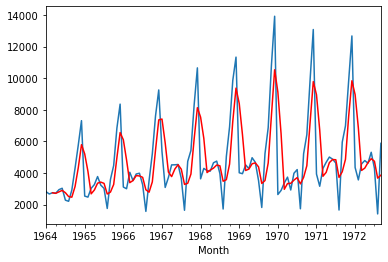

In [100]:
# plot os dados originais e os dados da média móvel 
series.plot()
rolling_mean.plot(color='red')
pyplot.show()

#### Média Móvel - Engenharia de Features



In [101]:
from pandas import DataFrame

In [102]:
# cria um dataframe df
df = DataFrame(series.values)

In [103]:
# imprime as 5 linhas do dataframe
df.head()

,0
0,2815
1,2672
2,2755
3,2721
4,2946


In [104]:
# cria uma constante
tamanho = 3

In [105]:
# cria uma variável com os dados deslocados +1
lag1 = df.shift(1)

In [106]:
# cria uma variável com os dados deslocados +3
lag3 = df.shift(tamanho)

In [107]:
# cria uma janela usando o rolling
window = lag3.rolling(window=tamanho)

In [108]:
# cria a variável media que é a média da jenela.
media = window.mean()

In [109]:
# imprime a variável media
media

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
100,6860.666667
101,4163.000000
102,4309.666667
103,4661.000000


In [110]:
# imprime o dataframe
df.head()

,0
0,2815
1,2672
2,2755
3,2721
4,2946


In [111]:
# concatena os dados
dataframe = concat([media, lag1, df], axis=1)

In [112]:
# cria as colunas
dataframe.columns = ['media', 't', 't+1']

In [113]:
lag3

,0
0,NaN
1,NaN
2,NaN
3,2815.0
4,2672.0
...,...
100,3564.0
101,4577.0
102,4788.0
103,4618.0


In [114]:
# imprime o dataframe
dataframe.head(10)

,media,t,t+1
0,NaN,NaN,2815
1,NaN,2815.0,2672
2,NaN,2672.0,2755
3,NaN,2755.0,2721
4,NaN,2721.0,2946
5,2747.333333,2946.0,3036
6,2716.000000,3036.0,2282
7,2807.333333,2282.0,2212
8,2901.000000,2212.0,2922
9,2754.666667,2922.0,4301


#### Previsões com Média Móvel



1.   Solução simples (walk-forward)
2.   Interessante para se criar baselines.
3.   Pode se usar Janelas Deslizantes para trabalhar com dados quentes.



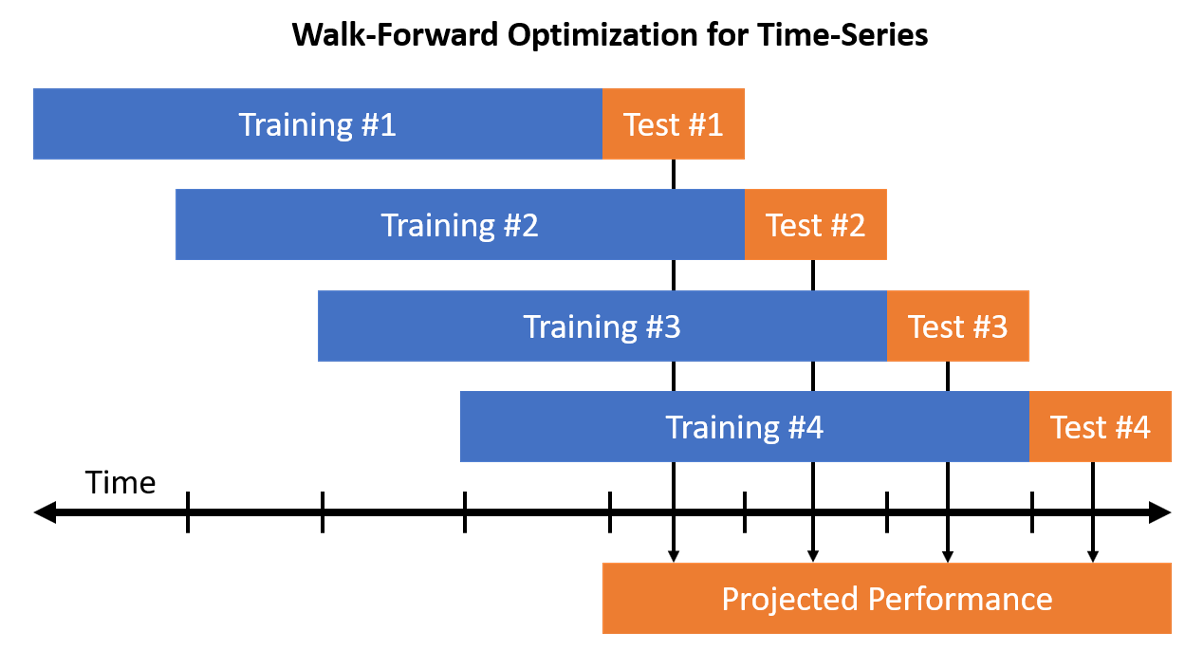

In [115]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error

In [116]:
series

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

In [117]:
# Define uma janela de 3 elementos
window = 3

In [118]:
# Obtem os 3 primeiros valores da serie
history = [series.values[i] for i in range(window)]

In [119]:
# imprime a variável history
history

[2815, 2672, 2755]

In [120]:
# Obtem todos os valores após os tres primeiros.
# range(3, tamanho_da_serie)

test = [series.values[i] for i in range(window, 13)]

In [121]:
# imprime a variável test
# 10 primeiros valores da série após o history
test

[2721, 2946, 3036, 2282, 2212, 2922, 4301, 5764, 7312, 2541]

In [122]:
# serie original
series.values

array([ 2815,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7312,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6872, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951,  6981,  9851, 12670,  4348,  3564,  4577,
        4788,  4618,  5312,  4298,  1413,  5877])

**Previsão com Média Móvel - Janela deslizante**

In [123]:
# Define uma variavel chamada X que é a copia da serie de dados
X = series.values

# Define a variável window = 3 que será a janela de 3 valores
window = 3

# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# Intera sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))                 

Valor predito=2747.333333, Valor real=2721.000000
Valor predito=2716.000000, Valor real=2946.000000
Valor predito=2807.333333, Valor real=3036.000000
Valor predito=2901.000000, Valor real=2282.000000
Valor predito=2754.666667, Valor real=2212.000000
Valor predito=2510.000000, Valor real=2922.000000
Valor predito=2472.000000, Valor real=4301.000000
Valor predito=3145.000000, Valor real=5764.000000
Valor predito=4329.000000, Valor real=7312.000000
Valor predito=5792.333333, Valor real=2541.000000
Valor predito=5205.666667, Valor real=2475.000000
Valor predito=4109.333333, Valor real=3031.000000
Valor predito=2682.333333, Valor real=3266.000000
Valor predito=2924.000000, Valor real=3776.000000
Valor predito=3357.666667, Valor real=3230.000000
Valor predito=3424.000000, Valor real=3028.000000
Valor predito=3344.666667, Valor real=1759.000000
Valor predito=2672.333333, Valor real=3595.000000
Valor predito=2794.000000, Valor real=4474.000000
Valor predito=3276.000000, Valor real=6838.000000


In [124]:
# calcula a métrica de rmse
rmse = sqrt(mean_squared_error(test, predicoes))                               

In [125]:
# imprime o valor de rmse
print('Métrica RMSE: %.3f' % rmse)

Métrica RMSE: 2960.299


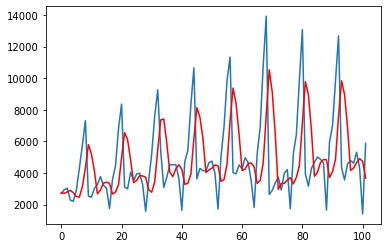

In [126]:
# plot o valor real (test) e as predições 
pyplot.plot(test) 
pyplot.plot(predicoes, color='red')
pyplot.show()